In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [117]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [118]:
from citipy import citipy

In [281]:
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(lats, lngs)
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hami cn
dzhusaly kz
ciudad bolivar ve
torbay ca
barentsburg sj
amderma ru
nago jp
sur om
kavieng pg
norman wells ca


In [283]:
coordinates = zip(lats, lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

10

In [284]:
import requests
requests.__version__

'2.24.0'

In [285]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [286]:
from config import weather_api_key

In [287]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9b233914f53e6d65b694d53010e3dcc0


In [288]:
#Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [289]:
# Loop through all the cities in our list.
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [290]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9b233914f53e6d65b694d53010e3dcc0&q=norman wells


In [325]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city} | {city_url}")
    # Add 1 to the record count.
    record_count += 1
    try:

        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hami | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9b233914f53e6d65b694d53010e3dcc0&q=hami
Processing Record 2 of Set 1 | dzhusaly | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9b233914f53e6d65b694d53010e3dcc0&q=dzhusaly
City not found. Skipping...
Processing Record 3 of Set 1 | ciudad bolivar | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9b233914f53e6d65b694d53010e3dcc0&q=ciudad+bolivar
Processing Record 4 of Set 1 | torbay | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9b233914f53e6d65b694d53010e3dcc0&q=torbay
Processing Record 5 of Set 1 | barentsburg | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9b233914f53e6d65b694d53010e3dcc0&q=barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | amderma | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

In [292]:
# Run an API request for each of the cities.


In [326]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hami,42.8000,93.4500,19.85,78,0,2.51,CN,2021-01-11 03:32:07
1,Ciudad Bolivar,8.1222,-63.5497,75.25,85,5,10.71,VE,2021-01-11 03:32:08
2,Torbay,47.6666,-52.7314,32.00,93,90,23.02,CA,2021-01-11 03:30:26
3,Nago,26.5881,127.9761,64.40,72,75,6.91,JP,2021-01-11 03:37:20
4,Sur,22.5667,59.5289,67.30,42,0,10.92,OM,2021-01-11 03:37:20
5,Kavieng,-2.5744,150.7967,84.29,69,94,4.07,PG,2021-01-11 03:37:21
6,Norman Wells,65.2820,-126.8329,1.40,85,20,3.44,CA,2021-01-11 03:37:21


In [294]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [295]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [296]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1610335937.692866

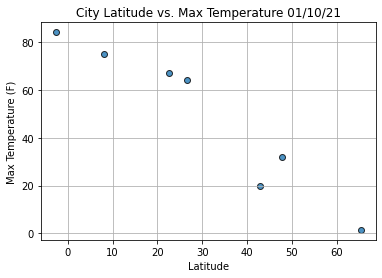

In [297]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

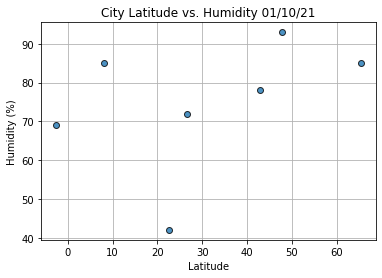

In [298]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

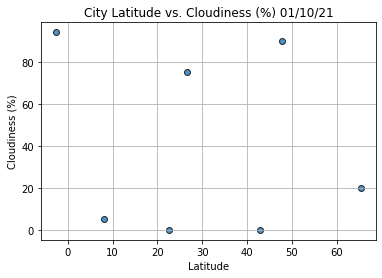

In [299]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

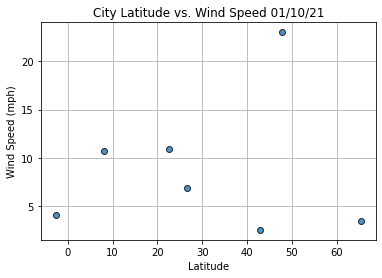

In [300]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [301]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress as stats

In [302]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]


In [303]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [304]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]


In [305]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [306]:
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hami,42.8000,93.4500,19.85,78,0,2.51,CN,2021-01-11 03:32:07
1,Ciudad Bolivar,8.1222,-63.5497,75.25,85,5,10.71,VE,2021-01-11 03:32:08
2,Torbay,47.6666,-52.7314,32.00,93,90,23.02,CA,2021-01-11 03:30:26
3,Nago,26.5881,127.9761,64.40,72,75,6.91,JP,2021-01-11 03:32:08
4,Sur,22.5667,59.5289,67.30,42,0,10.92,OM,2021-01-11 03:32:09


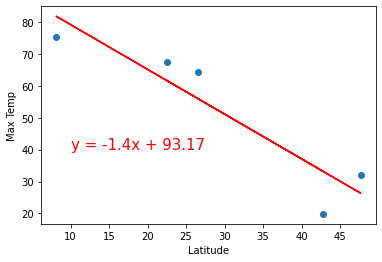

In [307]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

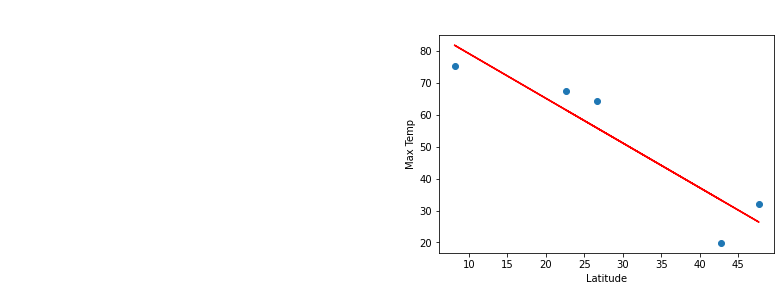

In [308]:
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \for Maximum Temperature', 'Max Temp',(-50,90))

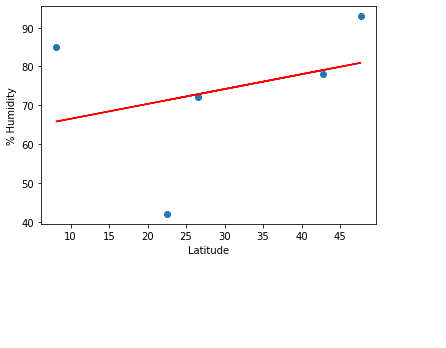

In [309]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


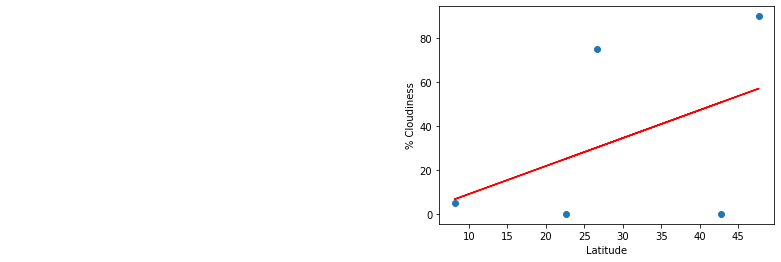

In [310]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

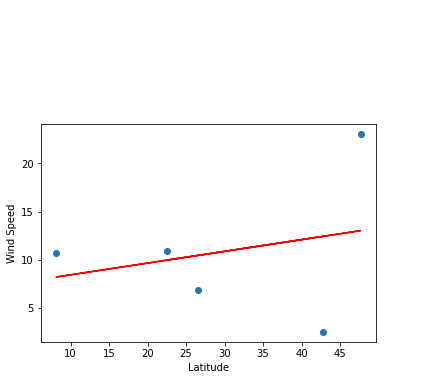

In [311]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


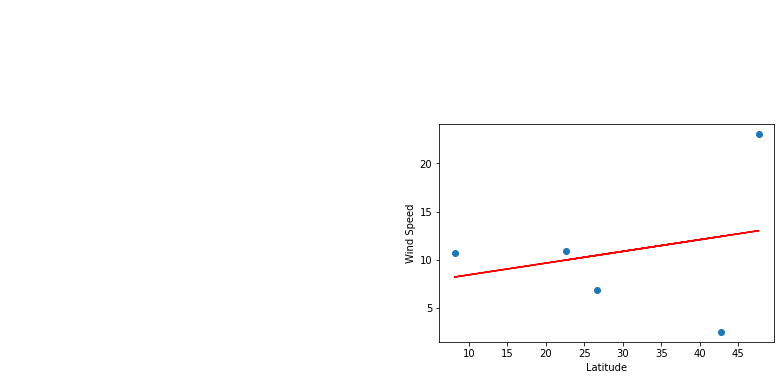

In [312]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [4]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [5]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Hami,42.8000,93.4500,19.85,78,0,2.51,CN,2021-01-11 03:32:07
1,1,Ciudad Bolivar,8.1222,-63.5497,75.25,85,5,10.71,VE,2021-01-11 03:32:08
2,2,Torbay,47.6666,-52.7314,32.00,93,90,23.02,CA,2021-01-11 03:30:26
3,3,Nago,26.5881,127.9761,64.40,72,75,6.91,JP,2021-01-11 03:32:08
4,4,Sur,22.5667,59.5289,67.30,42,0,10.92,OM,2021-01-11 03:32:09


In [6]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [7]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
#heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)


In [9]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [10]:
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

In [11]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))


What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [14]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,Ciudad Bolivar,8.1222,-63.5497,75.25,85,5,10.71,VE,2021-01-11 03:32:08
5,5,Kavieng,-2.5744,150.7967,84.29,69,94,4.07,PG,2021-01-11 03:32:09


preferred_cities_df.notnull().sum()

In [15]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Ciudad Bolivar,VE,75.25,8.1222,-63.5497,
5,Kavieng,PG,84.29,-2.5744,150.7967,


In [16]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'ATtYBwIRPTgDqVa5FUvOO6lVZKTOXXc4OnAl9DMYE-aSTFZe1ldIoi784DJW3p73n-EtkbopTIwwkGdA4YouEAIP3flVrGRVHeCTVpYvaY2UoNAoDpm8JRQcgieagKUZdp5Z50bFKUIgoOsQsiiG4M59csGiq8Hs_8yOgfeqisK8fd5SIcI6vB-wYaSRjNFf3Uq-b-pkmI2Zv_yWli6ebI9bP67kld5JwOEaVlpfP8Oi_YBxmbzRi9svZpODi76P-mQwPADayL2P1HAs3dcZIMwHTb60Wv4tsqi776qrcAHtdfD-2-E7Lq3xLGhhwzbKwEnUyPgxuMrW7H8F32wcl-ZoqG51G8JcZLVSbxZ8_fk_WPG1fwsKPD1CaEK763Dk_wLD_81LjN-4QDNsXz9IKbHhmonxyIRJvRI1jLrexMYLNQ6Hnm1JSJBUWQO5',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594393802915,
      'lng': 2.354352980291502},
     'southwest': {'lat': 48.8567414197085, 'lng': 2.351655019708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'name': 'Hôtel Duo',
   'opening_hours': {'open_now': True},
   'photos': [{'height': 3840,
     'html_attributions': ['<a href="https://

In [17]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Ciudad Bolivar,VE,75.25,8.1222,-63.5497,Hotel Edi
5,Kavieng,PG,84.29,-2.5744,150.7967,Nusa Island Retreat


In [19]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [22]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))